<a href="https://colab.research.google.com/github/Karen042009/chess/blob/main/Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt


data = load_iris() # մեր իրիսների dict
x = data["data"]  # առանձնացնում ենք data—իռիցը
y = data["target"] # առանձնացնում ենք target
y[y==2] = 1  # եթե պայմանը բավարարում է ապա փոխում ա 1
np.unique(x)# սետի տակ գցում ենք դատան վերցնելով 1 սյունակի առաջին ելեմենտը
np.unique(y)

array([0, 1])

In [29]:
node = {
    "gini": 1,  # Գինի ինդեքսը (1 նշանակում է ամենաբարձր անորոշությունը)
    "values": [],  #  թիվը քանակները
    "class": None,  # Առավել հաճախ հանդիպող դասը (եթե տերև է, ապա դա վերջնական դասակարգումն է)
    "samples": 0,  # Նմուշների ընդհանուր քանակը այս հանգույցում
    "condition": None,  # Պայման՝ ըստ որի տեղի է ունենում բաժանումը (օր.՝ «X[0] < 5»)
    "left": None,  # Ձախ ենթածառ
    "right": None,  # Աջ ենթածառ
}

In [85]:
import numpy as np


def gini(samples : int, values : list ):  #հաշվարկը gini
  if samples == 0:   # ախալ չի պայց պետք չի
    return 1
  pi_sum = 0
  values = np.unique(values) # ներքևի սխալի ուղում
  for element in values:
    # կամ սենց կամ
    pi_sum += (element/samples)**2
    # սենց pi_sum += (v / samples) * (v / samples) #  սխալ չի բայց ցանկալի չի ** 2
  return 1 - pi_sum
  """
    թե ինչ սխալ ա
    սխալ դեպքերը (սխալի բացատրությունը կտորմ ենք գրաֆիկից դուրս (x  առանցքից))
    best_split(x,y)
    [0, 0, 0]
    [0, 0, 0]
    [0, 0, 0]
    [0, 0, 0]
    [0, 0, 0]
    [0, 0, 0]
    [0, 0, 0]
    [0, 0, 0]
    [0, 0, 0]
    [0, 0, 0]
    [0, 0, 0]
    [0, 0, 0]
    [0, 0, 0]
    [0, 0, 0]
    (1.0, 0, 4.3)
    if samples == 0:
…      print(values)"""

In [17]:
gini(150,[50,50,50])

0.6666666666666667

In [91]:
def best_split(X, y):
  gini_list = []
  for feature in range(X.shape[1]): # վերցնելով 1 սյունակի առաջին ելեմենտը ․shape[1]
    thresholds = np.unique(x[:, feature]) # threshold հնարավոր կտրելու կետը   feature նույն սյունը
    for threshold in thresholds:
      left_mask = X[:, feature] <= threshold
      right_mask = ~left_mask # true -- false —— դարձնում   false -- true ——դարձնում

      left_values = [np.sum(y[left_mask] == 0), np.sum(y[left_mask] == 1),np.sum(y[left_mask] == 2)] # np.sum(y[left_mask] == 2)  մասկան օգտակործում ենք y վրա և եթե True ,np.sum() հաշվում ա գումարը
      left_samples = np.sum(left_values)
      right_values = [np.sum(y[right_mask] == 0),np.sum(y[right_mask] == 1),np.sum(y[right_mask] == 2)] # ctrl d  նշում ա նույն F2
      right_samples = np.sum(right_values)

      gini_left = gini(left_samples, left_values)  # հաշվում ենք gini-ն աջ ձախի համար
      gini_right = gini(right_samples, right_values)

      gini_score = (left_samples * gini_left + right_samples * gini_right) / (left_samples + right_samples)  # թվաբանական միջինը np.mean(gini_left, gini_right)
      gini_list.append((gini_score, feature, threshold))
      # print(f"Feature: {feature}, Threshold: {threshold}",end="\n")
  return min(gini_list,default=(1,None,None))

In [105]:
best_split(x,y)

(np.float64(0.0), 2, np.float64(1.9))

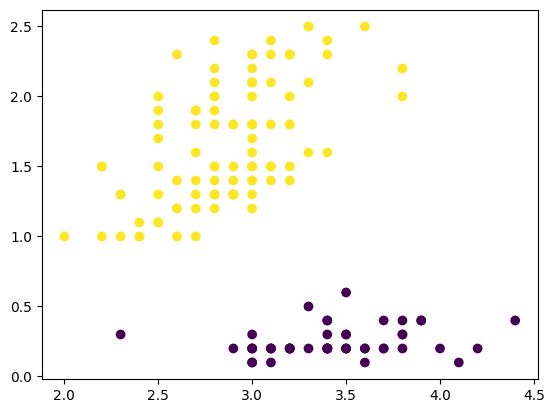

In [32]:
plt.scatter(x[:, 1], x[:,3], c=y)

In [103]:
def Tree(X, y, depth=0, max_depth=5): #max_depth - խորություն
  unique_classes, class_counts = np.unique(y, return_counts=True)
  if depth == max_depth or len(unique_classes) == 1:
    return {'label': unique_classes[np.argmax(class_counts)]}
    """
    if max_depth == 0 or len(set(y)) == 1:
    return {"label":np.argmax(np.bincount(y))} # np.argmax(np.bincount(y))
    #argmax տալիս ա ամենամեծ ելեմենտի ինդեքսը
    #argmին ամենափոքրը
    #np.bincount([1,2,3]) սետ count"""
  gini_score, feature, threshold = best_split(X, y)
  if feature is None:  # No valid split found
    return {'label': unique_classes[np.argmax(class_counts)]}

  left_mask = X[:,feature] <= threshold
  right_mask = ~left_mask

  left_subtree = Tree(X[left_mask],y[left_mask], depth+1 ,max_depth)
  right_subtree = Tree(X[right_mask],y[right_mask], depth+1, max_depth)

  return {"gini" : gini_score,
          "feature":feature,
          "threshold": threshold,
          "left": left_subtree,
          "right": right_subtree}

In [94]:
def plot_tree(tree, x=0.5, y=1.0, dx=0.2, dy=0.1, ax=None, depth=0):
    if ax is None:
        fig, ax = plt.subplots(figsize=(20,20))
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.axis('off')

    if 'label' in tree:
        gini_text = f"Gini: {tree.get('gini', 'N/A'):.2f}\n" if 'gini' in tree else ""
        ax.text(x, y, f"{gini_text}Class: {tree['label']}", ha='center', va='center',
                bbox=dict(facecolor='lightblue', edgecolor='black', boxstyle='round,pad=0.5'))
        return

    gini_text = f"Gini: {tree.get('gini', 'N/A'):.2f}\n" if 'gini' in tree else ""
    ax.text(x, y, f"{gini_text}X[{tree['feature']}] <= {tree['threshold']:.2f}", ha='center', va='center',
                bbox=dict(facecolor='lightgray', edgecolor='black', boxstyle='round,pad=0.5'))
    left_x, right_x = x - dx / (depth + 1), x + dx / (depth + 1)
    left_y, right_y = y - dy, y - dy

    ax.plot([x, left_x], [y - 0.02, left_y + 0.02], 'k-', lw=1, zorder=1)
    ax.plot([x, right_x], [y - 0.02, right_y + 0.02], 'k-', lw=1, zorder=1)

    plot_tree(tree['left'], left_x, left_y, dx, dy, ax, depth + 1)
    plot_tree(tree['right'], right_x, right_y, dx, dy, ax, depth + 1)

def visualize_tree(tree):
    plot_tree(tree)
    plt.tight_layout()
    plt.show()

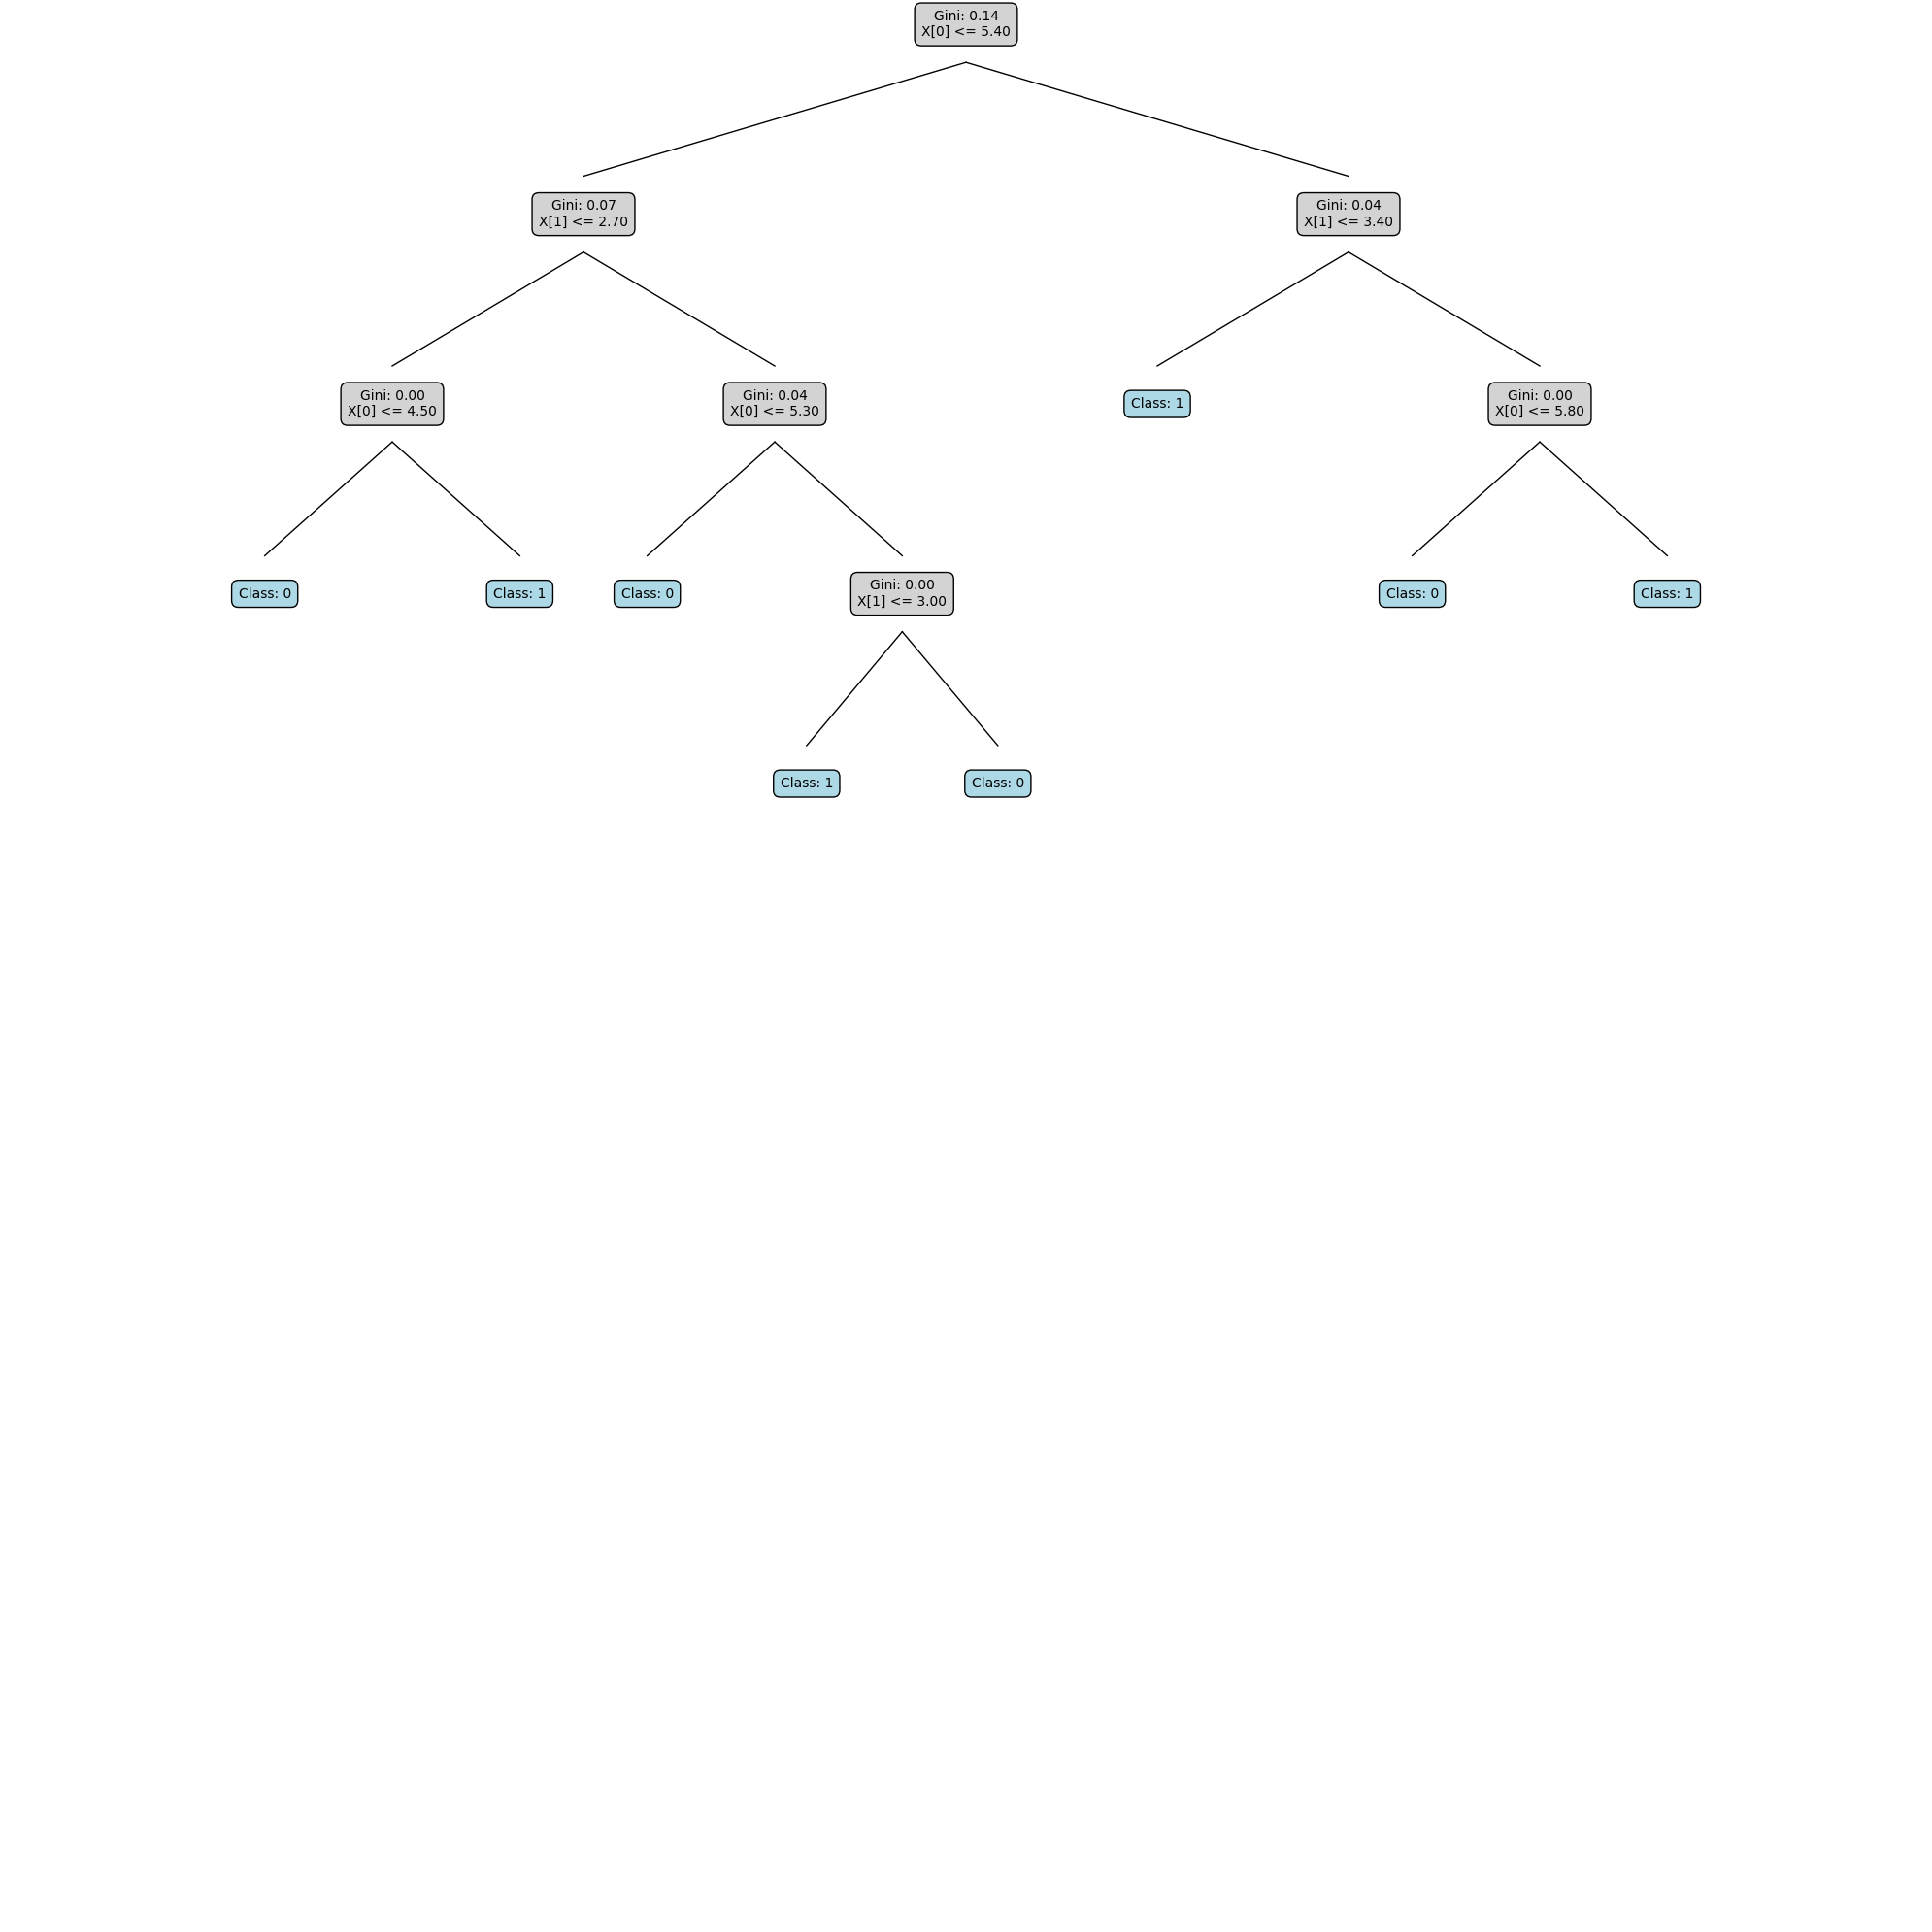

In [104]:
tdree = Tree(x[:,:2], y)
visualize_tree(tdree)